Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_110.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_111.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_113.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_114.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_115.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_116.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_12.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_120.jpg
Saved: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images\rotated_122.jpg
Saved: C:\Users\Resh

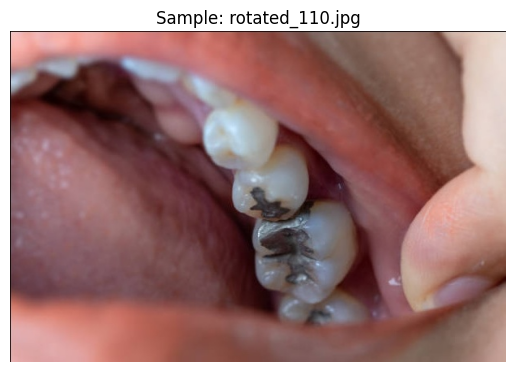

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Define original image directory
image_dir = r'C:\Users\Reshmi\Capstone-Project\milestone3\Raw_images'

# Define separate output directory for rotated images
save_dir = r'C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\Unlabeled\rotated_images'
os.makedirs(save_dir, exist_ok=True)

# Get up to 1000 .jpg files from the source folder
image_filenames = [
    fname for fname in os.listdir(image_dir)
    if fname.lower().endswith(".jpg")
][:1000]

# Rotate and save images
for fname in image_filenames:
    image_path = os.path.join(image_dir, fname)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Failed to load {fname}")
        continue

    height, width = img.shape[:2]
    center = (width // 2, height // 2)

    # Create rotation matrix for 180 degrees
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
    rotated_img = cv2.warpAffine(img, rotate_matrix, (width, height))

    save_path = os.path.join(save_dir, f"rotated_{fname}")
    cv2.imwrite(save_path, rotated_img)
    print(f"Saved: {save_path}")

print("All images rotated and saved in a separate folder!")

# --- Display the first rotated image ---

rotated_files = [f for f in os.listdir(save_dir) if f.lower().endswith(".jpg")]
if rotated_files:
    first_image_path = os.path.join(save_dir, rotated_files[0])
    test_image = cv2.imread(first_image_path)
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    plt.imshow(test_image_rgb)
    plt.axis("off")
    plt.title(f"Sample: {rotated_files[0]}")
    plt.show()
else:
    print("No rotated images found to display.")
